<a href="https://colab.research.google.com/github/etorres14/PremierLeague-Analysis/blob/main/PremierLeague-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [3]:
#Get data & create dataframe
url_3 = 'https://fbref.com/en/comps/9/schedule/Premier-League-Scores-and-Fixtures'
pl22 = pd.read_html(url_3, header = 0)
pl22 = pl22[0]

# Basic Data Cleaning

In [6]:
pl22.head(5)

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report,Notes
0,1.0,Fri,2021-08-13,20:00,Brentford,1.3,2–0,1.4,Arsenal,16479.0,Brentford Community Stadium,Michael Oliver,Match Report,NaN
1,1.0,Sat,2021-08-14,12:30,Manchester Utd,1.5,5–1,0.6,Leeds United,72732.0,Old Trafford,Paul Tierney,Match Report,NaN
2,1.0,Sat,2021-08-14,15:00,Leicester City,0.8,1–0,1.1,Wolves,31983.0,King Power Stadium,Craig Pawson,Match Report,NaN
3,1.0,Sat,2021-08-14,15:00,Burnley,1.0,1–2,1.3,Brighton,16910.0,Turf Moor,David Coote,Match Report,NaN
4,1.0,Sat,2021-08-14,15:00,Chelsea,0.9,3–0,0.3,Crystal Palace,38965.0,Stamford Bridge,Jonathan Moss,Match Report,NaN


In [7]:
print(pl22.isnull().sum())
#153 matches haven't been played yet so I want to probably create a subset of my data with only matches that have been played
#I'll do this towards the end


print(pl22.info())
#Need to fix Date column and Time column
#Label Home and Away XG's
#Split Score and make columns for Home and Away Score, then reoder.
#Drop Match Report Column
#Create a column that indicates the final match result

Wk               66
Day              66
Date             66
Time             66
Home             66
xG              147
Score           147
xG.1            147
Away             66
Attendance      148
Venue            66
Referee         147
Match Report     68
Notes           444
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Wk            380 non-null    float64
 1   Day           380 non-null    object 
 2   Date          380 non-null    object 
 3   Time          380 non-null    object 
 4   Home          380 non-null    object 
 5   xG            299 non-null    float64
 6   Score         299 non-null    object 
 7   xG.1          299 non-null    float64
 8   Away          380 non-null    object 
 9   Attendance    298 non-null    float64
 10  Venue         380 non-null    object 
 11  Referee       299 non-null    object 


In [8]:
# Change Date column to DateTime format
pl22['Date'] = pd.to_datetime(pl22['Date'])

In [9]:
#rename xG columns
pl22.rename(columns={'xG': 'HxG', 'xG.1': 'AxG'}, inplace=True)

In [10]:
#split Score column into away and home score
def home_score(input):
  input = str(input)
  return input[0]
def away_score(input):
  input = str(input)
  return input[2]


pl22["Home_Score"] = pl22.Score.apply(home_score)
pl22["Away_Score"] = pl22.Score.apply(away_score)

In [11]:
# Code gets rid of the n's in our new columns and converts our columns data type into float
pl22 = pl22.replace({'n': None})
pl22["Home_Score"] = pd.to_numeric(pl22["Home_Score"])
pl22["Away_Score"] = pd.to_numeric(pl22["Away_Score"])

In [12]:
#compares home and away scores columns to get result of the match.
def get_result(row):
  if row.Home_Score > row.Away_Score:
    return "H"
  elif row.Home_Score < row.Away_Score:
    return "A"
  elif row.Home_Score == row.Away_Score:
    return "D"
  else:
    return None

pl22["Result"] = pl22.apply(get_result, axis = "columns")

In [13]:
#Here I can drop and reorganize the columns at the same time becuase of the small amount of them
pl22 = pl22[['Wk', 'Day', 'Date', 'Time', 'Home', 'HxG','Home_Score', 'Away_Score', 'AxG', 'Away', "Result",
       'Attendance', 'Venue', 'Referee', 'Notes']]

# Data Visualization: Exploring Home Field Advantage

In [15]:
print(pl22.Home_Score.value_counts())
print(pl22.Away_Score.value_counts())

1.0    89
0.0    78
2.0    73
3.0    38
4.0    12
5.0     5
7.0     2
6.0     2
Name: Home_Score, dtype: int64
1.0    101
0.0     91
2.0     58
3.0     32
4.0     13
5.0      4
Name: Away_Score, dtype: int64


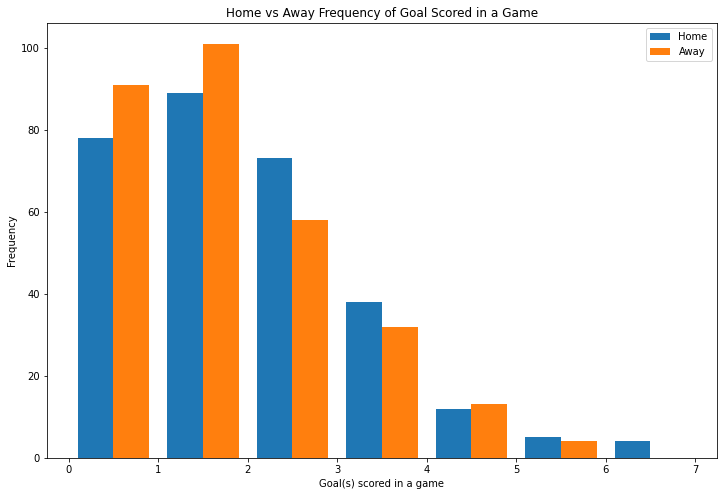

In [18]:
plt.hist([pl22.Home_Score, pl22.Away_Score], bins = 7, label=['Home', 'Away'])
plt.legend(loc='upper right')
plt.xlabel("Goal(s) scored in a game")
plt.ylabel("Frequency")
plt.title("Home vs Away Frequency of Goal Scored in a Game")
plt.rcParams["figure.figsize"] = (12,8)
plt.show()

Text(0.5, 1.0, 'Frequency of Home Wins, Away Wins, and Draws')

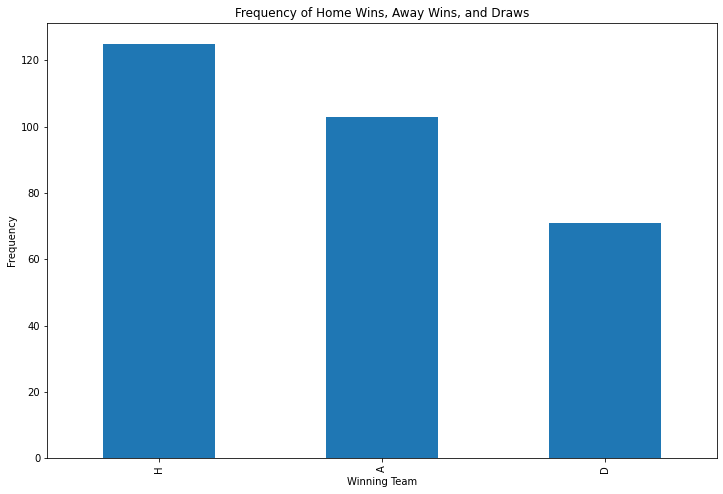

In [17]:
pl22.Result.value_counts().plot(kind = "bar")
plt.ylabel("Frequency")
plt.xlabel("Winning Team")
plt.title("Frequency of Home Wins, Away Wins, and Draws")

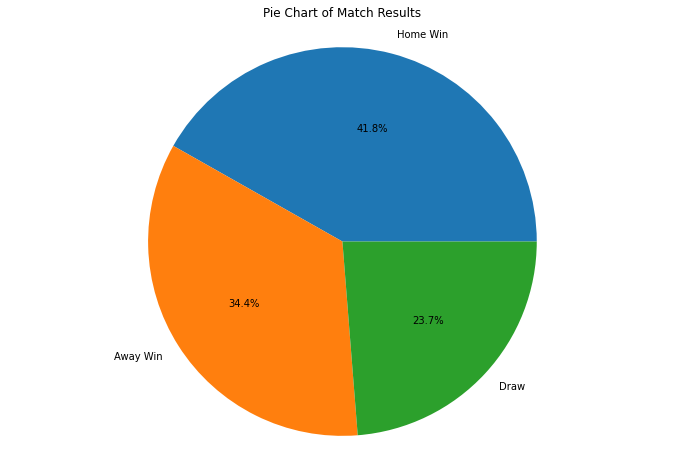

In [19]:
label = ['Home Win', 'Away Win', 'Draw']
plt.pie(pl22.Result.value_counts(),labels = label,autopct='%1.1f%%')
plt.title('Pie Chart of Match Results')
plt.axis('equal')
plt.show()

In [20]:
print(pl22.groupby("Home").Home_Score.mean())
print(pl22.groupby("Away").Away_Score.mean())

Home
Arsenal            1.600000
Aston Villa        1.714286
Brentford          1.066667
Brighton           0.625000
Burnley            0.866667
Chelsea            2.071429
Crystal Palace     1.562500
Everton            1.357143
Leeds United       1.125000
Leicester City     1.714286
Liverpool          2.600000
Manchester City    2.857143
Manchester Utd     1.562500
Newcastle Utd      1.428571
Norwich City       0.666667
Southampton        1.333333
Tottenham          2.066667
Watford            1.000000
West Ham           1.812500
Wolves             1.125000
Name: Home_Score, dtype: float64
Away
Arsenal            1.428571
Aston Villa        1.125000
Brentford          1.312500
Brighton           1.142857
Burnley            0.857143
Chelsea            1.933333
Crystal Palace     1.214286
Everton            0.866667
Leeds United       1.133333
Leicester City     1.357143
Liverpool          2.533333
Manchester City    1.875000
Manchester Utd     1.714286
Newcastle Utd      0.812500
Norwi

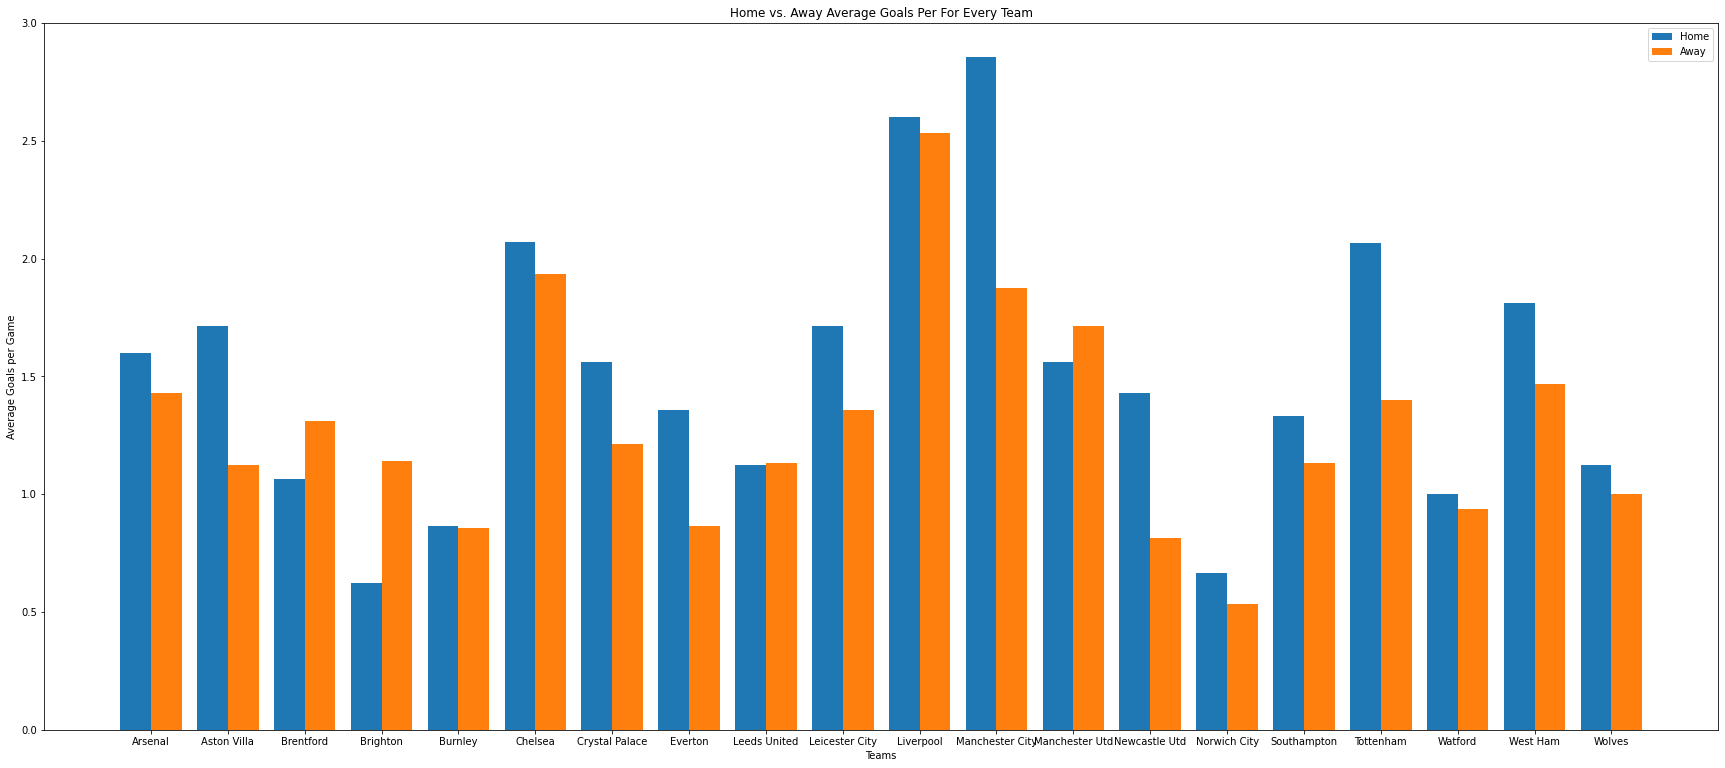

In [24]:
X_axis = np.arange(len(teams))
  
plt.bar(X_axis - 0.2, pl22.groupby("Home").Home_Score.mean(), 0.4, label = 'Home')
plt.bar(X_axis + 0.2, pl22.groupby("Away").Away_Score.mean(), 0.4, label = 'Away')
  
plt.xticks(X_axis, teams)
plt.xlabel("Teams")
plt.ylabel("Average Goals per Game")
plt.title("Home vs. Away Average Goals Per For Every Team")
plt.rcParams["figure.figsize"] = (30,15)
plt.legend()
plt.show()


# Creating new columns for analysis and creating model.

## Creating New Features (Columns)

In [25]:
#Create another data frame with fixtures that have already been played
df1 = pl22[pl22["Home_Score"].isnull() == False]
#create a sorted team names array that will be usefull later
teams = df1.Home.unique()
teams = np.sort(teams)

In [26]:
# these two functions will help retreive the home and away stats I create in future functions that return lists
def hstat(stat):
  return stat[0]

def astat(stat):
  return stat[1]

In [27]:
games_played = {}
for i in teams:
  games_played[i] = 0


def gp(row):
# This function is doing two things:
# 1) returning the home and away games played up before the match
# 2) updating our dictionary to add increment games played after the match
  h = games_played[row.Home]
  a = games_played[row.Away]
  games_played[row.Home] += 1
  games_played[row.Away] += 1
# I return a list in order to get points for both teams
# I will need to split this list up into the two different columns later. 
  return [h,a]

df1["gp"] = df1.apply(gp, axis = "columns")

df1["Home_gp"] = df1["gp"].apply(hstat)
df1["Away_gp"] = df1["gp"].apply(astat)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [28]:
#creating an empty dictionary to keep track of the total points a certain team has
team_pts = {}
for i in teams:
  team_pts[i] = 0


def tpts(row):
# This function is doing two things:
# 1) returning the home and away points up before the match
# 2) updating our dictionary to add the ponints received after the match
  h = team_pts[row.Home]
  a = team_pts[row.Away]
  if row.Result == "H":
    team_pts[row.Home] += 3
  elif row.Result == "A":
    team_pts[row.Away] += 3
  elif row.Result == None:
    return None
  else:
    team_pts[row.Home] += 1
    team_pts[row.Away] += 1
# I return a list in order to get points for both teams
# I will need to split this list up into the two different columns later. 
  return [h,a]

df1["pts"] = df1.apply(tpts, axis = "columns")

df1["Home_pts"] = df1.pts.apply(hstat)
df1["Away_pts"] = df1.pts.apply(astat)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [29]:
df1["Home_ppg"] = df1["Home_pts"]/ df1["Home_gp"]
df1["Away_ppg"] = df1["Away_pts"]/ df1["Away_gp"]

df1[['Home_ppg', "Away_ppg"]] = df1[['Home_ppg', "Away_ppg"]].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [30]:
team_form = {}
for i in teams:
  team_form[i] = ""

def form(row):
  h = team_form[row.Home]
  a = team_form[row.Away]
  if row.Result == "H":
    team_form[row.Home] += "W"
    team_form[row.Away] += "L"
  elif row.Result == "A":
    team_form[row.Home] += "L"
    team_form[row.Away] += "W"
  else:
    team_form[row.Home] += "D"
    team_form[row.Away] += "D"
  return [h[-5:],a[-5:]]

df1["form"] = df1.apply(form, axis = "columns")

df1["Home_form"] = df1.form.apply(hstat)
df1["Away_form"] = df1.form.apply(astat)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [31]:
# Here I create a dictionary to assign points to different results
fp = {"W":3,"D":1,"L":0}

# The function here gets the total form points from my form columns
def formpts(form):
  total = 0
  for i in form:
    total += fp[i]
  return total

df1["Away_fp"] = df1["Away_form"].apply(formpts)
df1["Home_fp"] = df1["Home_form"].apply(formpts)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [32]:
# With this dictionary I use arrays for my values.
# This is to help keep track of the number of goals scored in each game.
# It also helps when i want to calculate the means / tandard deviations
gs = {}
for i in teams:
  gs[i] = np.array([])

def goals(row):
  h = gs[row.Home]
  a = gs[row.Away]
  gs[row.Home] = np.append(gs[row.Home],row.Home_Score)
  gs[row.Away] = np.append(gs[row.Away],row.Away_Score) 
  return [h.sum(),a.sum()]

df1["goals"] = df1.apply(goals, axis = "columns")

df1["Home_gs"] = df1["goals"].apply(hstat)
df1["Away_gs"] = df1["goals"].apply(astat)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [33]:
df1["Home_gspg"] = df1["Home_gs"]/ df1["Home_gp"]
df1["Away_gspg"] = df1["Away_gs"]/ df1["Away_gp"]

df1[['Home_gspg', "Away_gspg"]] = df1[['Home_gspg', "Away_gspg"]].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [34]:
# With this dictionary I use arrays for my values.
# This is to help keep track of the number of goals scored in each game.
# It also helps when i want to calculate the means / tandard deviations
gc = {}
for i in teams:
  gc[i] = np.array([])

def goals_conceded(row):
  h = gc[row.Home]
  a = gc[row.Away]
  gc[row.Home] = np.append(gc[row.Home],row.Away_Score)
  gc[row.Away] = np.append(gc[row.Away],row.Home_Score) 
  return [h.sum(),a.sum()]

df1["gc"] = df1.apply(goals_conceded, axis = "columns")

df1["Home_gc"] = df1["gc"].apply(hstat)
df1["Away_gc"] = df1["gc"].apply(astat)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [35]:
df1["Home_gcpg"] = df1["Home_gc"]/ df1["Home_gp"]
df1["Away_gcpg"] = df1["Away_gc"]/ df1["Away_gp"]

df1[['Home_gcpg', "Away_gcpg"]] = df1[['Home_gcpg', "Away_gcpg"]].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [36]:
# Dropping and Re-arranging columns
df1 = df1[['Wk', 'Day', 'Date', 'Time', 'Home', 'HxG', 'Home_Score', 'Away_Score',
       'AxG', 'Away', 'Result', 'Attendance', 'Venue', 'Referee', 'Home_gp', 'Away_gp', 'Home_pts', 'Away_pts',
       'Home_ppg', 'Away_ppg','Home_form', 'Away_form', 'Home_fp',
       'Away_fp','Home_gs', 'Away_gs', 'Home_gc', 'Away_gc', "Home_gspg", "Away_gspg", 'Home_gcpg', "Away_gcpg"]]

In [37]:
df1[df1.Result == "D"]

,Wk,Day,Date,Time,Home,HxG,Home_Score,Away_Score,AxG,Away,...,Home_fp,Away_fp,Home_gs,Away_gs,Home_gc,Away_gc,Home_gspg,Away_gspg,Home_gcpg,Away_gcpg
14,2.0,Sat,2021-08-21,15:00,Leeds United,1.5,2.0,2.0,2.0,Everton,...,0,3,1.0,3.0,5.0,1.0,1.000000,3.000000,5.000000,1.000000
15,2.0,Sat,2021-08-21,15:00,Crystal Palace,0.6,0.0,0.0,0.9,Brentford,...,0,3,0.0,2.0,3.0,0.0,0.000000,2.000000,3.000000,0.000000
18,2.0,Sun,2021-08-22,14:00,Southampton,0.8,1.0,1.0,1.4,Manchester Utd,...,0,3,1.0,5.0,3.0,1.0,1.000000,5.000000,3.000000,1.000000
24,3.0,Sat,2021-08-28,15:00,West Ham,1.2,2.0,2.0,0.7,Crystal Palace,...,6,1,8.0,0.0,3.0,3.0,4.000000,0.000000,1.500000,1.500000
25,3.0,Sat,2021-08-28,15:00,Aston Villa,0.6,1.0,1.0,1.1,Brentford,...,3,4,4.0,2.0,3.0,0.0,2.000000,1.000000,1.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,27.0,Sat,2022-02-26,15:00,Manchester Utd,2.9,0.0,0.0,0.5,Watford,...,11,4,44.0,25.0,34.0,47.0,1.692308,1.000000,1.307692,1.880000
322,29.0,Mon,2022-03-14,20:00,Crystal Palace,0.8,0.0,0.0,2.3,Manchester City,...,8,12,39.0,68.0,38.0,18.0,1.392857,2.428571,1.357143,0.642857
337,31.0,Sat,2022-04-02,15:00,Leeds United,1.1,1.0,1.0,1.7,Southampton,...,6,6,34.0,36.0,67.0,45.0,1.133333,1.241379,2.233333,1.551724
340,31.0,Sat,2022-04-02,15:00,Brighton,2.8,0.0,0.0,0.3,Norwich City,...,0,0,26.0,18.0,36.0,63.0,0.896552,0.620690,1.241379,2.172414


In [38]:
df1.to_excel("premier_league.xlsx")

## Creating Logistic Regression Model

In [39]:
y = df1.Result

In [40]:
features = ['Home_ppg', 'Away_ppg', 'Home_fp', 'Away_fp', 'Home_gspg', 'Away_gspg', 'Home_gcpg', "Away_gcpg"]

In [41]:
x = df1[features]

In [42]:
clf = LogisticRegression(random_state=0).fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [43]:
def predict_game(hteam, ateam):
  lst = [team_pts[hteam]/games_played[hteam],
              team_pts[ateam]/games_played[ateam], 
              formpts(team_form[hteam][-5:]), 
              formpts(team_form[ateam][-5:]), 
              sum(gs[hteam])/games_played[hteam], 
              sum(gs[ateam])/games_played[ateam],
              sum(gc[hteam])/games_played[hteam], 
              sum(gc[ateam])/games_played[ateam]
              ]
  return clf.predict(np.array([lst]))[0]

In [44]:
teams

array(['Arsenal', 'Aston Villa', 'Brentford', 'Brighton', 'Burnley',
       'Chelsea', 'Crystal Palace', 'Everton', 'Leeds United',
       'Leicester City', 'Liverpool', 'Manchester City', 'Manchester Utd',
       'Newcastle Utd', 'Norwich City', 'Southampton', 'Tottenham',
       'Watford', 'West Ham', 'Wolves'], dtype=object)

In [45]:
predict_game("Crystal Palace", "Tottenham")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


'H'